### Computational Methods (16:540:540) ###

#### Spring 2021 Homework 5 – Python Coding ####


1. Generate 100 random samples from univariate normal and exponential distributions. Then, calculate the means and the standard deviation.
2. Generate 100 random samples from multivariate normal distribution. Then, calculate means and covariance matrix.
3. Perform Multiple Linear Regression using the same dataset generated in the
class as follows: predict 𝑦
a) Using only 𝑥1 ,
b) Using variables 𝑥1 , ... , 𝑥3
c) Using all variables 𝑥1 , ... , 𝑥𝑝
d) Compare the performance for both training and test data using MSE and R-squared.

In [2]:
import numpy as np
import pandas as pd
from numpy.random import default_rng
rng = default_rng(5)

In [3]:
# 1. Generate 100 random samples from univariate normal and exponential distributions. Then, calculate the means and the standard deviation.

In [4]:
mu, sigma = 5,1
n = 100
x1 = rng.normal(mu,sigma,n)
x1_mean = np.mean(x1)
x1_var = np.var(x1)

print(f'From univariate normal distribution,the mean of 100 random the samples is {x1_mean},the variance is {x1_var}')

From univariate normal distribution,the mean of 100 random the samples is 4.775992733090337,the variance is 0.7791377243518098


In [5]:
y1 =rng.exponential(size=n)
y1_mean = np.mean(y1)
y1_var = np.var(y1)

print(f'From exponential distribution,the mean of 100 random the samples is {y1_mean},the variance is {y1_var}')

From exponential distribution,the mean of 100 random the samples is 0.9659351362133682,the variance is 0.7781621514620671


In [6]:
# 2. Generate 100 random samples from multivariate normal distribution. Then, calculate means and covariance matrix.

In [7]:
# P=6, N=100
mu = np.random.uniform(-10,10,size=6)
C = np.random.random((6,6))
cov = C @ C.T # positive semi-definite
x2 = rng.multivariate_normal(mu, cov, n)

In [35]:
# pd.DataFrame(mu).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6 non-null      float64
dtypes: float64(1)
memory usage: 176.0 bytes


In [34]:
# pd.DataFrame(cov).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6 non-null      float64
 1   1       6 non-null      float64
 2   2       6 non-null      float64
 3   3       6 non-null      float64
 4   4       6 non-null      float64
 5   5       6 non-null      float64
dtypes: float64(6)
memory usage: 416.0 bytes


In [10]:
x2_mean = np.mean(x2)
x2_var = np.var(x2)

print(f'From univariate normal distribution,the mean of 100 random the samples is {x2_mean},the variance is {x2_var}')

From univariate normal distribution,the mean of 100 random the samples is 0.19663191163661414,the variance is 41.81540011998317


In [11]:
# 3. Perform Multiple Linear Regression using the same dataset generated in the
# class as follows: 
# predict 𝑦
# a) Using only 𝑥1 ,
# b) Using variables 𝑥1 , ... , 𝑥3
# c) Using all variables 𝑥1 , ... , 𝑥𝑝
#  d) Compare the performance for both training and test data using MSE and R-squared.

The output

𝑦=9+3∗𝑥2 +2∗𝑥5+𝜀 

𝜀~𝑁(0,1)

In [12]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error,r2_score
regr = linear_model.LinearRegression()
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
x = x2

In [13]:
# a) Using only 𝑥1 

In [14]:
rng = default_rng(5)
y = 9+3*x[:,1]+2*x[:,4] + rng.normal(0,1,n) 

In [15]:
# y

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)

In [17]:
X1_train = x_train[:, 0:1]
X1_test = x_test[:, 0:1]

In [18]:
# pd.DataFrame(x_train),
# pd.DataFrame(X1_test),
# pd.DataFrame(y_train)

In [19]:
regr_1 = linear_model.LinearRegression()

In [20]:
regr1 = linear_model.LinearRegression()
regr1.fit(X1_train, y_train)
pred1_test = regr1.predict(X1_test)

In [21]:
print("Mean squared error: %.2f"% mean_squared_error(y_test, pred1_test))
print('Variance score: %.2f(best fit = 1)' % r2_score(y_test, pred1_test))

Mean squared error: 15.80
Variance score: 0.79(best fit = 1)


Text(0, 0.5, 'Predicted')

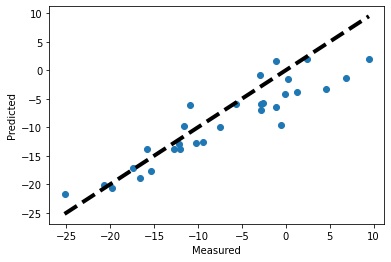

In [22]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred1_test)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

In [23]:
# b) Using variables 𝑥1 , ... , 𝑥3

In [24]:
X2_train = x_train[:, 0:3]
X2_test = x_test[:, 0:3]

In [25]:
regr2 = linear_model.LinearRegression()
regr2.fit(X2_train, y_train)
pred2_test = regr2.predict(X2_test) 

In [26]:
print("Mean squared error: %.2f"% mean_squared_error(y_test, pred2_test))
print('Variance score: %.2f(best fit = 1)' % r2_score(y_test, pred2_test))

Mean squared error: 4.90
Variance score: 0.93(best fit = 1)


Text(0, 0.5, 'Predicted')

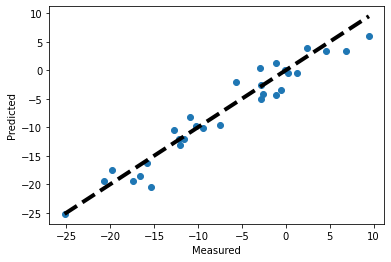

In [27]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred2_test)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

Mean squared error: 3.71
Variance score: 0.94(best fit = 1)


In [28]:
# c) Using all variables 𝑥1 , ... , 𝑥𝑝
X3_train = x_train[:, 0:6]
X3_test = x_test[:, 0:6]

In [29]:
regr3 = linear_model.LinearRegression()
regr3.fit(X3_train, y_train)
pred3_test = regr3.predict(X3_test) 

In [30]:
print("Mean squared error: %.2f"% mean_squared_error(y_test, pred3_test))
print('Variance score: %.2f(best fit = 1)' % r2_score(y_test, pred3_test))

Mean squared error: 1.17
Variance score: 0.98(best fit = 1)


Text(0, 0.5, 'Predicted')

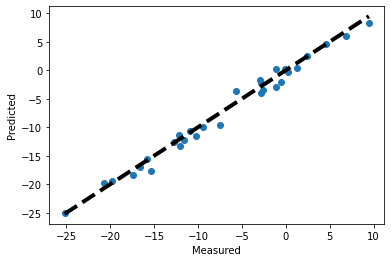

In [31]:
fig, ax = plt.subplots()
ax.scatter(y_test, pred3_test)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')

In [32]:
#  d) Compare the performance for both training and test data using MSE and R-squared.

Based on the results of MSE and $R^2$ error from a b and c , we can find from c results which use all varaiables works best to fit the data set. 